In [ ]:
# import libraries
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [ ]:
# declare path for frames
col_frames = os.listdir("/content/drive/MyDrive/NUS Stats CV Workshop 2021/frames")

In [ ]:
# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
# create empty list to store images
col_images = []

for frame in col_frames:
	# read the frames
	temp_img = cv2.imread("/content/drive/MyDrive/NUS Stats CV Workshop 2021/frames/" + frame)

	# append the temp image into the list of images
	col_images.append(temp_img)

In [ ]:
# take a look at the first item in col_images
col_images[0].shape

(144, 256, 3)

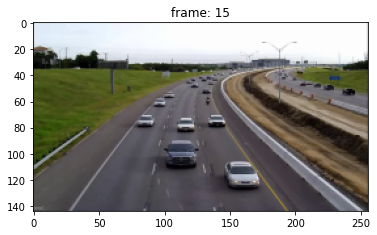

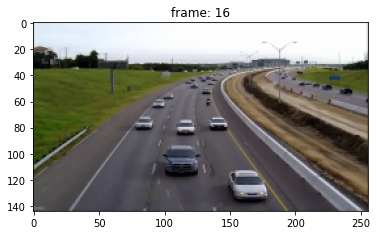

In [ ]:
# plot the 15th frame
num = 15

for frame in [num, num+1]:
  plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
  plt.title("frame: " + str(frame))
  plt.show()

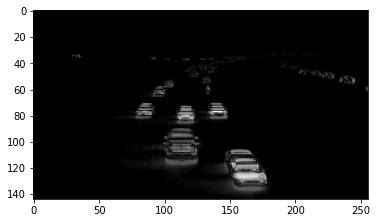

In [ ]:
# convert images to grayscale
grayA = cv2.cvtColor(col_images[num], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[num+1], cv2.COLOR_BGR2GRAY)

# plot image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap="gray")
plt.show()

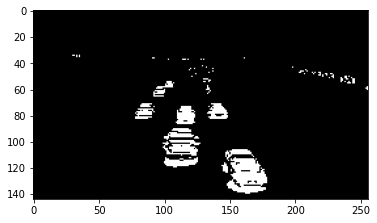

In [ ]:
# save diff into a variable
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
# helps filter low intensity 
plt.imshow(thresh, cmap="gray")
plt.show()

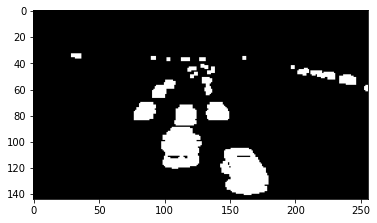

In [ ]:
# reduce resolution using image dilation
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

# plot diluted image
plt.imshow(dilated, cmap="gray")
plt.show()

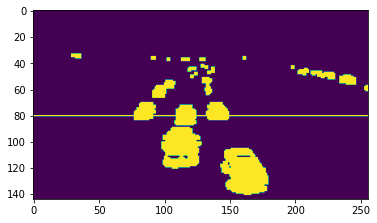

In [ ]:
# plot a vehicle detection zone
plt.imshow(dilated)

# draw a line
cv2.line(dilated, (0,80), (256,80), (256,0,0))
plt.show()

In [ ]:
# find contour
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

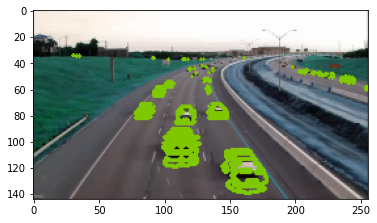

In [ ]:
temp_copy = col_images[15].copy()

cv2.drawContours(temp_copy, contours, -1, (127, 200, 0), 2)
plt.imshow(temp_copy)
plt.show()

In [ ]:
# declare list of valid contours
valid_cntrs = []

for i, cntr in enumerate(contours):
  x, y, w, h = cv2.boundingRect(cntr)
  if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
    valid_cntrs.append(cntr)

# check length of list
len(valid_cntrs)

7

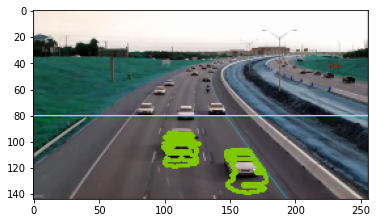

In [ ]:
temp_copy = col_images[15].copy()

cv2.drawContours(temp_copy, valid_cntrs, -1, (127, 200, 0), 2)
cv2.line(temp_copy, (0,80), (256,80), (100,255,255))

plt.imshow(temp_copy)
plt.show()

In [ ]:
# reduce resolution using image dilation
kernel = np.ones((4,4), np.uint8)

# declare a pathIn to save the output frames
pathIn="/content/drive/MyDrive/NUS Stats CV Workshop 2021/output_frames/"

# font
font = cv2.FONT_HERSHEY_SIMPLEX


In [ ]:
# loop through all images
for i in range(len(col_images) -1):

  # do frame differencing
  grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
  diff_image = cv2.absdiff(grayB, grayA)

  # perform image thresholding
  ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

  # image dilation
  dilated = cv2.dilate(thresh, kernel, iterations=1)

  # find contours
  contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

  # get list of legit contours
  valid_cntrs = []

  for i, cntr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
      if (y >=90) & (cv2.contourArea(cntr) < 40):
        valid_cntrs.append(cntr)

  # add contours to original frame
  copy = col_images[i].copy()
  cv2.drawContours(copy, valid_cntrs, -1, (127,200,0),2)

  # put text on image
  cv2.putText(copy, "vehicles detected: " + str(len(valid_cntrs)), (55,15), font, 0.6, (0,255,0))
  cv2.line(copy, (0,80), (256,80), (100,255,255))
  cv2.imwrite(pathIn + str(i) + '.png', copy)


In [ ]:
# specify video name
pathOut = '/content/drive/MyDrive/NUS Stats CV Workshop 2021/output_video.mp4'

# specify frames per second
fps = 14.0

In [ ]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [ ]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
for i in range(len(files)):
  filename = pathIn + files[i]

  # read frames
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width, height)

  # inserting the frames into an image array
  frame_array.append(img)

out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
  out.write(frame_array[i])

out.release()
